In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
babies = np.loadtxt('children.txt',delimiter=' ')

print(babies.shape)

(551, 2)


(137, 2)
(138, 2)
(276, 2)


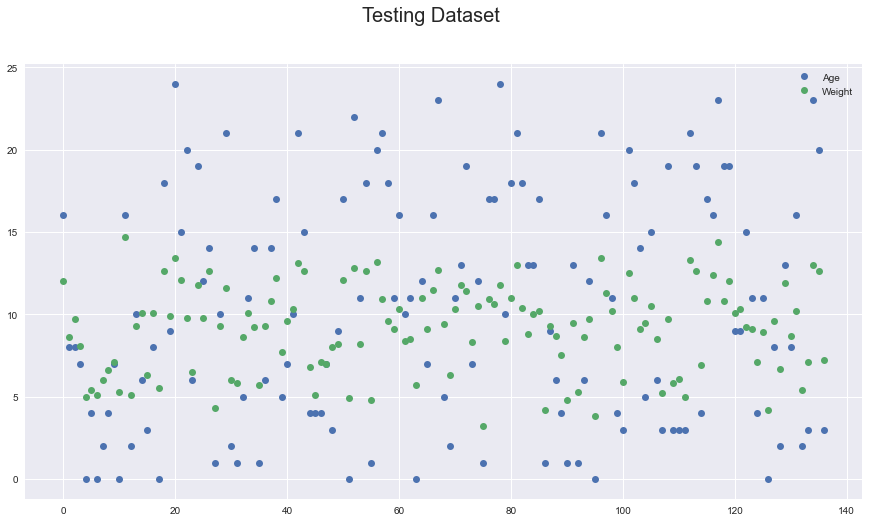

In [19]:
# QUESTION 1 

# random split where it divides the dataset in two: training dataset and the dataset for validation and testing.
def random_split(data,test_points):
    ranks = np.arange(data.shape[0])
    np.random.shuffle(ranks)
    train = data[ranks>=test_points,:]
    test = data[ranks<test_points,:]
    return train,test

#Create a subset out of the full dataset for the different stages: 276 data points for the training (usually the stage in which we need more data)
train, temp = random_split(babies, 275)

# The dataset not used in training is used to create the validation and testing dataset. Create two subsets: one validation subset to choose the model and another test subset to check unbisiadness. 
valid, test = random_split(temp, 137)

#We divided this way because normally the training dataset uses half the points, while the other half is usually split in two again.

plt.figure(figsize = (15,8))

plt.plot(test,"o")
plt.legend(['Age',"Weight"])
plt.suptitle('Testing Dataset', fontsize=20)
#plt.show()

print(test.shape)
print(valid.shape)
print(train.shape)

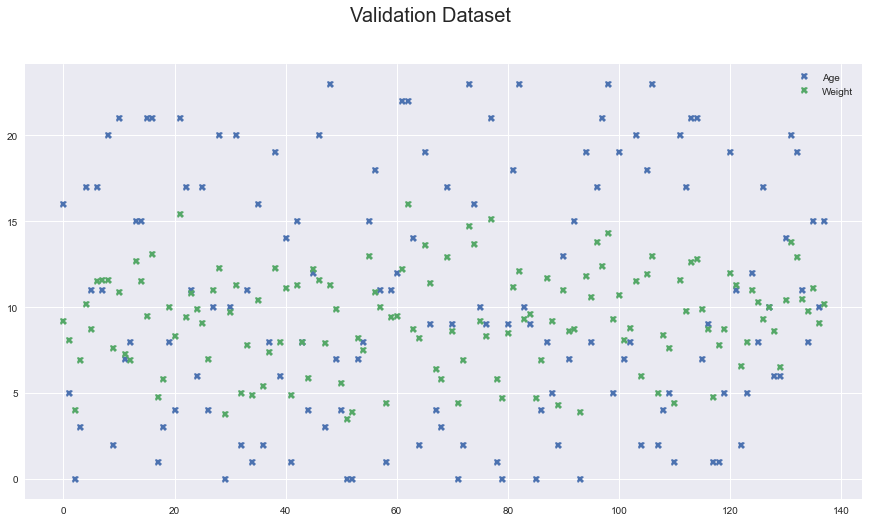

In [20]:
plt.figure(figsize = (15,8))

plt.plot(valid,"X")
plt.legend(['Age',"Weight"])
plt.suptitle('Validation Dataset', fontsize=20)
plt.show()


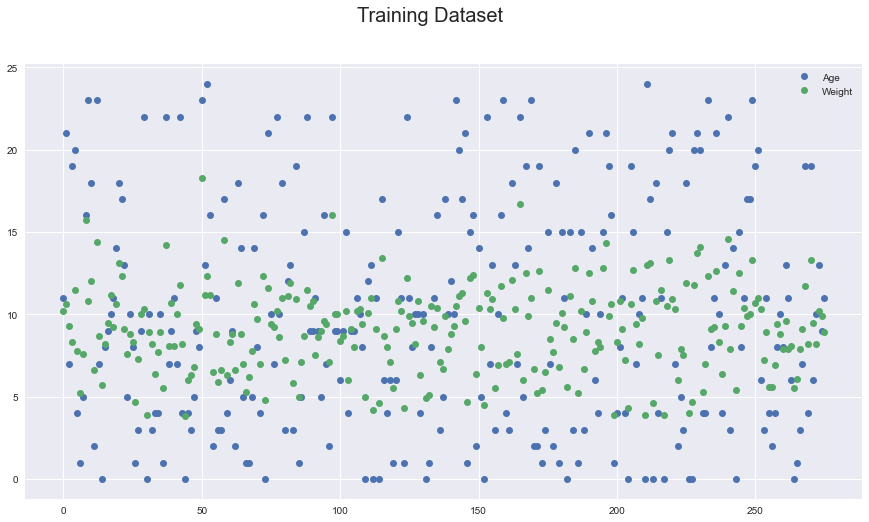

In [21]:
plt.figure(figsize = (15,8))

plt.plot(train,"o")
plt.legend(['Age',"Weight"])
plt.suptitle('Training Dataset', fontsize=20)
plt.show()

In [22]:
# QUESTION 2

def mean_square_error(data,coefs):
    # Return mean squared error  X on age, Y on weight  
    pred = np.polyval(coefs,data[:,0])
    error = np.mean((data[:,1]-pred)**2)
    return error

best_err = 10000000 # very large number just for the first time the if clause passes

# choose the polyniomial degree which gives the minimum error 
for degree in range(1,13):
    coefs = np.polyfit(train[:,0],train[:,1],degree)
    valid_error = mean_square_error(valid,coefs)
    #if this error is less than the error already stored, changed the stored error, coefficient and the degree by the new one.
    if valid_error < best_err:
        best_err = valid_error
        best_coef = coefs
        best_degree = degree
        
#use the coefficient on the test data set now instead of the trained test.
#test_error = mean_square_error(test,best_coef)
print('Best degree:', best_degree, "\nBest Error:", best_err, '\nBest Coefficient:', best_coef)

Best degree: 3 
Best Error: 1.6070573092774187 
Best Coefficient: [ 6.57395486e-04 -3.19262281e-02  7.36370298e-01  4.74814157e+00]


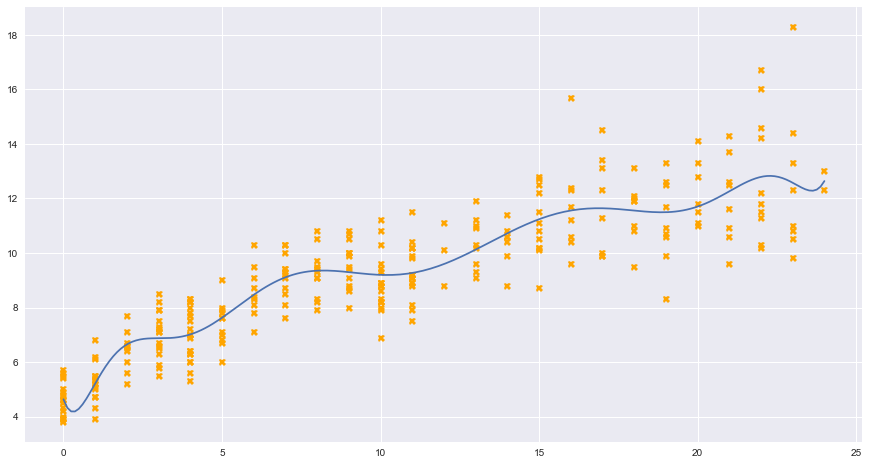

In [24]:
x= train[:,0]
y=train[:,1]
points = np.linspace(0, max(x), 200) #use 200 points
poly = np.polyval(coefs, points) #calculate the value for each x defined by points, considering the coefficients calculated by polyfit

plt.figure(figsize = (15,8))
plt.plot(x,y, 'X', c="orange")
plt.plot(points, poly, '-')



Question 3[3 points out of 20]Indicate  what  is  the  expected  error  of  your  curve  when  predicting  the  weight  of  children  from  their  age  inmonths.  Note that the error should be in Kg, so take careful note of the units you are computing.  Justify youranswer, both the value obtained and the data used to obtain it

In [15]:
# QUESTION 3
test_error = np.sqrt(mean_square_error(test, best_coef))
print('Expected error is the error of the model on the test database:',test_error,'KG')

Expected error is the error of the model on the test database: 1.1805625285937293 KG


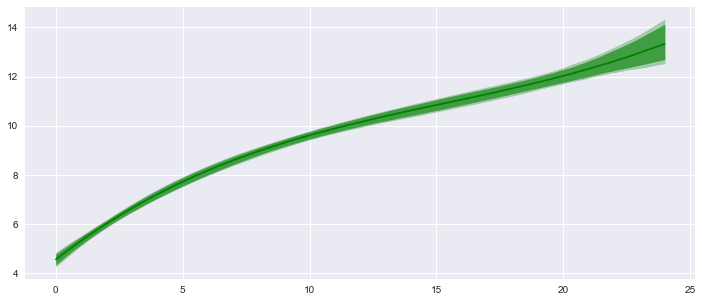

In [54]:
plt.style.use("seaborn")

#receive the data, the number of replicas we want to do, the values on the x-axis and the width of the kernel we are going to use.
def bootstrap_regression (data, replicas, x, degree):
    lines = []
    params = []
    # repeat the code for the number of replicas we have specified
    for _ in range(replicas):
        
        #generate array of random integers: specify the lower and upperbound in the array. 
        ixs = np.random.randint(0, data.shape[0], data.shape[0])
        
        # replicated data with respective columns
        rep_data = data[ixs, :]
        #calculate coefs of replicated data with degree inputted by the user
        coefs = np.polyfit(rep_data[:,0], rep_data[:,1], degree)
        
        y = np.polyval(coefs, x)
        params.append(coefs)
        lines.append(y)
        # return list of parameters and all the lines of the replicas
    return np.array(params), np.array(lines)

# defining a function to plot the values correctly and uniformly if we need to do more. 
def plot_bootstrap(lines, x, color):
    center = np.percentile(lines, 50, axis=0)
    interval = np.percentile (lines, [0.5, 2.5,97.5, 99.5],axis=0)
    plt.plot(x, center, '-',color=color)
    plt.fill_between(x, interval[0,:], interval[-1,:], color=color, alpha=0.3)
    plt.fill_between(x, interval[1,:], interval[2,:], color=color, alpha=0.6)


plt.figure(figsize=(12,5))

# Create a line/regression
x = np.linspace(0, 24 ,100)

#Use dataset of babies with 1000 replicas with X already defined above and the best polynomial degree for our model
params, lines = bootstrap_regression(babies, 1000, x, best_degree)

plot_bootstrap(lines,x,'green')

IndexError: too many indices for array

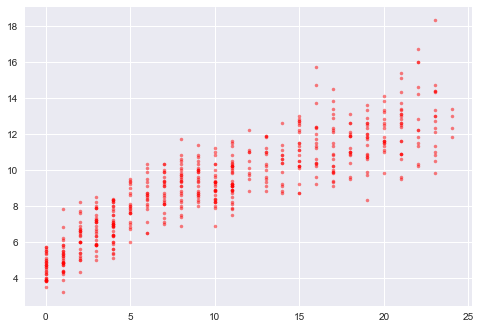

In [94]:
def plot_hw_data(baby,x):
    plt.plot(babies[:,0], babies[:,1],'.r', alpha=0.5)
    plt.plot(x[:,0], x[:,1],'.b', alpha=0.5)
    plt.xlabel('Weight, Kg')
    plt.ylabel('Height, cm')
    plt.xlim( (0,30))
    
plot_hw_data(babies,x)
    

ValueError: could not broadcast input array from shape (1000,4) into shape (1000)

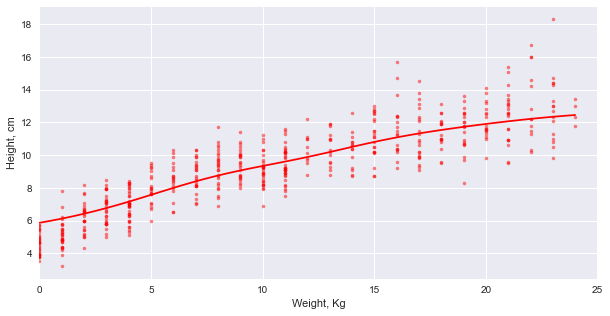

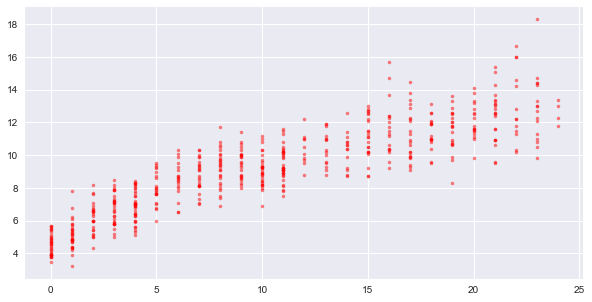

In [90]:
def gaussiank(u):
    k=np.e**(-0.5*u**2)/np.sqrt(2*np.pi)
    return k


def nad_wat(K, h, X, Y, x):
    num = 0    
    den = 0
    for ix in range(len(X)):
        u = (x-X[ix])/h
        k = K(u)
        num = num + Y[ix] * k
        den = den + k
    return num/den

def plot_trend(data,x,color,h=3):
    line = nad_wat(gaussiank,h,data[:,0],data[:,1],x)
    plt.plot(x,line,'-',color=color)


def bootstrap_regression1(data,replicas,x,h):  
    lines = []
    for _ in range(replicas):    
        ixs = np.random.randint(0,data.shape[0],data.shape[0])
        rep_data = data[ixs,:]
        lines.append(nad_wat(gaussiank,h,rep_data[:,0],rep_data[:,1],x))
        return np.array(lines)
    
    
def plot_with_bootstrap(data, x, h, color, replicas=1000):
    bs = bootstrap_regression(data, replicas, x, h)
    reg = np.percentile(bs,50,axis=0)
    interval = np.percentile(bs,[0.5,5,95,99.5],axis=0)
    plt.plot(x,reg,'-', color=color)
    plt.fill_between(x,interval[0,:],interval[-1,:],color=color,alpha=0.3)
    plt.fill_between(x,interval[1,:],interval[2,:],color=color,alpha=0.6)
    
    
plt.figure(figsize=(10,5))
plot_hw_data(babies)
x = np.linspace(0,24)
plot_trend(babies,x,'red')

plt.figure(figsize=(10,5))
x = np.linspace(10,100,100)
plt.plot(babies[:,0], babies[:,1],'.r', alpha=0.5)
plot_with_bootstrap(babies, x, 3, 'red')